# Prerequisites

## Install Library

In [125]:
# for python 3.11.4
%pip install -r requirements.txt

Python(77659) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import Library

In [126]:
## Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularPredictor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, make_scorer, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, ConfusionMatrixDisplay, average_precision_score, cohen_kappa_score
from sklearn.model_selection import train_test_split
import json
import joblib
import warnings
warnings.filterwarnings("ignore")

## Read Data

In [127]:
df = pd.read_csv("/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/data/fraudTrain_cleaned.csv", index_col=0)

In [128]:
# Convert trans_date_trans_time to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [129]:
df.head()

,trans_date_trans_time,cc_num,merchant,amt,first,last,gender,street,city,state,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,distance
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,514,4.97,Jennifer,Banks,0,561 Perry Cove,526,27,...,0,0,0,1,0,0,0,0,0,78.773821
1,2019-01-01 00:00:44,630423337322,241,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,612,47,...,0,0,0,0,0,0,0,0,0,30.216618
2,2019-01-01 00:00:51,38859492057661,390,220.11,Edward,Sanchez,1,594 White Dale Suite 530,468,13,...,0,0,0,0,0,0,0,0,0,108.102912
3,2019-01-01 00:01:16,3534093764340240,360,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,84,26,...,0,0,0,0,0,0,0,0,0,95.685115
4,2019-01-01 00:03:06,375534208663984,297,41.96,Tyler,Garcia,1,408 Bradley Rest,216,45,...,0,0,0,0,1,0,0,0,0,77.702395


In [130]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'age', 'hour', 'day', 'month', 'year', 'is_weekend',
       'is_weekday', 'time_diff', 'diff_days', 'diff_hours', 'diff_minutes',
       'diff_seconds', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'distance'],
      dtype='object')

In [131]:
df.dtypes

trans_date_trans_time      datetime64[ns]
cc_num                              int64
merchant                            int64
amt                               float64
first                              object
last                               object
gender                              int64
street                             object
city                                int64
state                               int64
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                 int64
dob                                object
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
age                                 int64
hour                                int64
day                               

In [132]:
df.isnull().sum()

trans_date_trans_time      0
cc_num                     0
merchant                   0
amt                        0
first                      0
last                       0
gender                     0
street                     0
city                       0
state                      0
zip                        0
lat                        0
long                       0
city_pop                   0
job                        0
dob                        0
trans_num                  0
unix_time                  0
merch_lat                  0
merch_long                 0
is_fraud                   0
age                        0
hour                       0
day                        0
month                      0
year                       0
is_weekend                 0
is_weekday                 0
time_diff                  0
diff_days                  0
diff_hours                 0
diff_minutes               0
diff_seconds               0
category_entertainment     0
category_food_

In [133]:
df_all = df.copy()

# Time-based split
split_time = df_all['trans_date_trans_time'].quantile(0.8)
df_train = df_all[df_all['trans_date_trans_time'] < split_time]
df_test = df_all[df_all['trans_date_trans_time'] >= split_time]

split_time_val = df_train['trans_date_trans_time'].quantile(0.8)
df_train_final = df_train[df_train['trans_date_trans_time'] < split_time_val]
df_val = df_train[df_train['trans_date_trans_time'] >= split_time_val]

In [134]:
df_train_final.shape, df_val.shape, df_test.shape

((829872, 48), (207468, 48), (259335, 48))

# Model Pipeline

## AutoGluon

### Model Training

In [135]:
predictor = TabularPredictor(label='is_fraud', eval_metric='average_precision', path='/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/ml_training/single_sequential_version/models/Classification/autogluon_output').fit(
    train_data=df_train_final,
    tuning_data=df_val,
    time_limit=600
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.6.0: Mon Jul 29 21:14:21 PDT 2024; root:xnu-10063.141.2~1/RELEASE_ARM64_T8103
CPU Count:          8
Memory Avail:       2.66 GB / 16.00 GB (16.6%)
Disk Space Avail:   81.41 GB / 460.43 GB (17.7%)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.6.0: Mon Jul 29 21:14:21 PDT 2024; root:xnu-10063.141.2~1/RELEASE_ARM64_T8103
CPU Count:          8
Memory Avail:       2.66 GB / 16.00 GB (16.6%)
Disk Space Avail:   81.41 GB / 460.43 GB (17.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more

In [136]:
predictor.leaderboard(df_test, silent=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.872739,0.875340,average_precision,6.684985,4.911787,390.508291,0.017566,0.275591,29.352617,2,True,5
1,RandomForestGini,0.834541,0.826069,average_precision,1.367489,1.230139,148.128029,1.367489,1.230139,148.128029,1,True,3
2,LightGBM,0.832190,0.837753,average_precision,0.909126,1.058059,38.330482,0.909126,1.058059,38.330482,1,True,2
3,CatBoost,0.777179,0.773092,average_precision,0.245326,0.495966,82.800919,0.245326,0.495966,82.800919,1,True,4
4,LightGBMXT,0.744367,0.696906,average_precision,4.145478,1.852032,91.896244,4.145478,1.852032,91.896244,1,True,1


### Evaluate and Compare The Results

In [137]:
performance = predictor.evaluate(df_test)
print(performance)

{'average_precision': 0.8727386033491416, 'accuracy': 0.9982647926427208, 'balanced_accuracy': 0.8747113830499379, 'mcc': 0.8416122162669688, 'roc_auc': 0.982443386607762, 'f1': 0.8367198838896952, 'precision': 0.9466338259441708, 'recall': 0.7496749024707412}


In [138]:
# --- Predict on test set ---
y_true = df_test['is_fraud'].values
y_pred = predictor.predict(df_test).values
y_proba = predictor.predict_proba(df_test)[1].values  # probability for class 1 (fraud)

Classification Report

In [139]:
# Evaluate on test set
print(classification_report(y_true, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9985    0.9997    0.9991    257797
           1     0.9466    0.7497    0.8367      1538

    accuracy                         0.9983    259335
   macro avg     0.9726    0.8747    0.9179    259335
weighted avg     0.9982    0.9983    0.9982    259335



Confusion Matrix

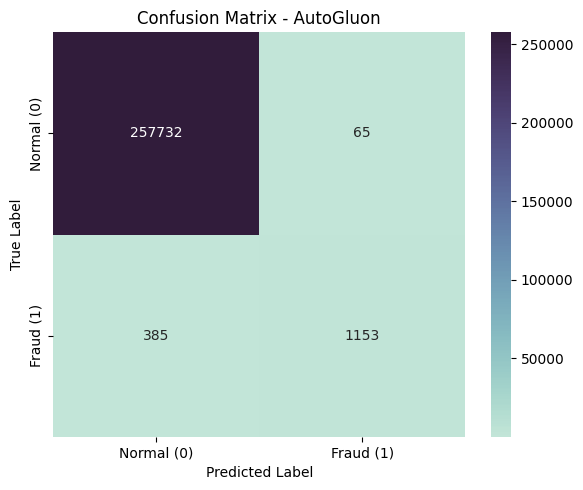

In [140]:
cm = confusion_matrix(y_true, y_pred)
labels = ['Normal (0)', 'Fraud (1)']
plt.figure(figsize=(6, 5))
cubehelix_cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.heatmap(cm, annot=True, fmt='d', cmap=cubehelix_cmap, xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - AutoGluon')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [151]:
metrics = {
    "Method": ["AutoGluon"],
    "Precision": [
        precision_score(y_true, y_pred)
    ],
    "Recall": [
        recall_score(y_true, y_pred)
    ],
    "F1-Score": [
        f1_score(y_true, y_pred)
    ],
    "ROC-AUC": [
        roc_auc_score(y_true, y_proba)
    ],
    "PR-AUC": [
        average_precision_score(y_true, y_proba)
    ],
    "Cohen Kappa": [
        cohen_kappa_score(y_true, y_pred)
    ]
}

df_metrics = pd.DataFrame(metrics)
display(df_metrics)

,Method,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Cohen Kappa
0,AutoGluon,0.946634,0.749675,0.83672,0.982443,0.872739,0.835859


ROC Curve

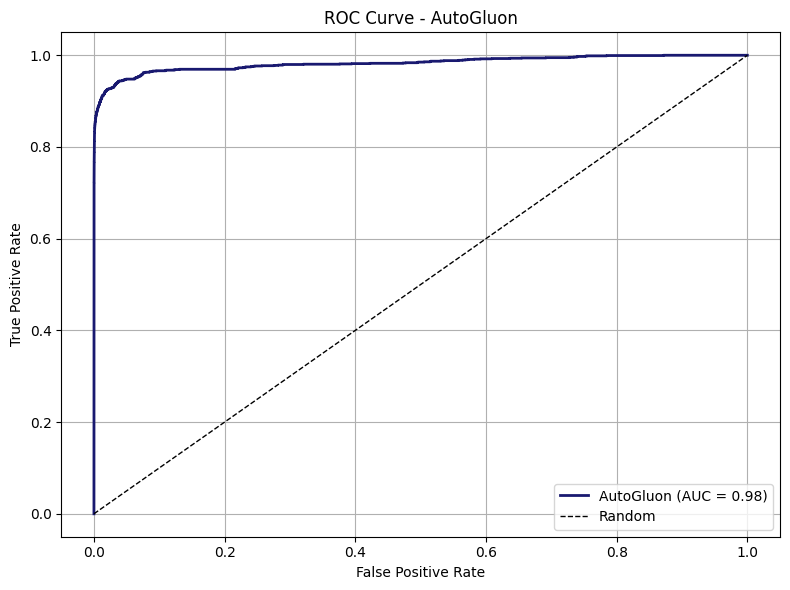

In [142]:
# --- Display ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_true, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='midnightblue', lw=2, label=f'AutoGluon (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AutoGluon')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Precision-Recall Curve

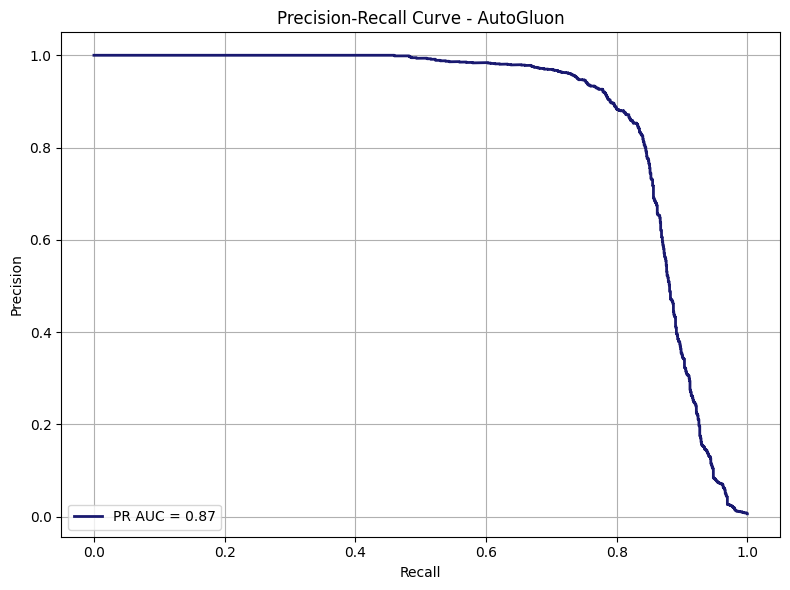

In [143]:
# --- Display Precision-Recall Curve ---
precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
pr_auc = average_precision_score(y_true, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='midnightblue', lw=2, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - AutoGluon')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()

Metrics Comparison

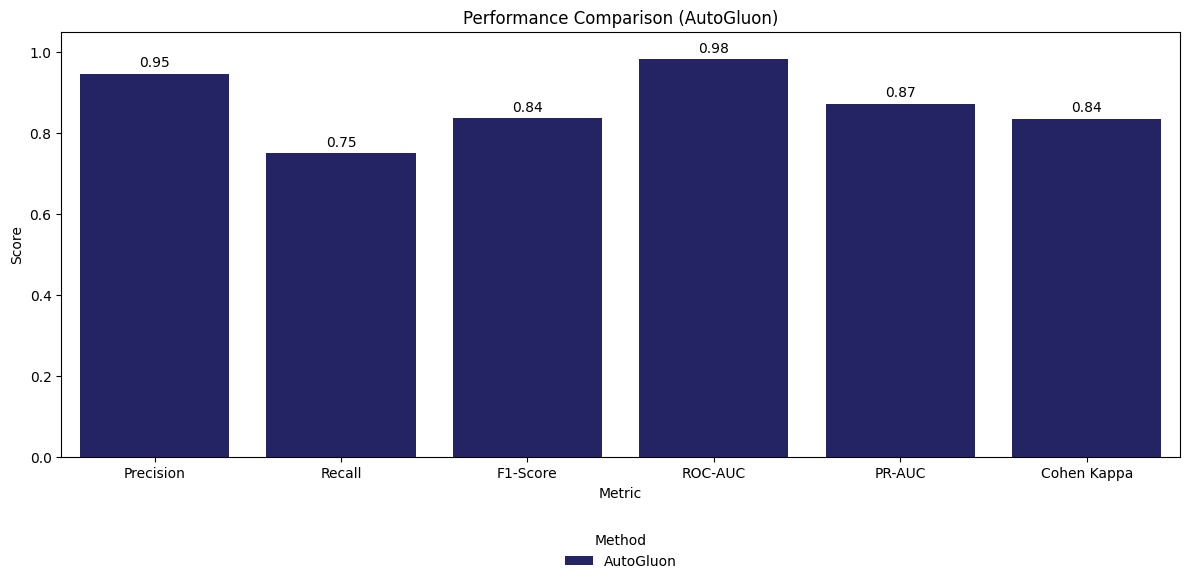

In [144]:
# --- Display Metrics Comparison ---
metrics = {
    "Method": ["AutoGluon"],
    "Precision": [precision_score(y_true, y_pred)],
    "Recall": [recall_score(y_true, y_pred)],
    "F1-Score": [f1_score(y_true, y_pred)],
    "ROC-AUC": [roc_auc],
    "PR-AUC": [pr_auc],
    "Cohen Kappa": [cohen_kappa_score(y_true, y_pred)]
}
df_metrics = pd.DataFrame(metrics)
df_melt = df_metrics.melt(id_vars="Method", var_name="Metric", value_name="Score")
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_melt, x="Metric", y="Score", hue="Method", palette=["midnightblue"])
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 0.01,
            f'{height:.2f}',
            ha="center", va="bottom"
        )
plt.title("Performance Comparison (AutoGluon)")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend(
    title="Method",
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
    frameon=False
)
plt.tight_layout()
plt.grid(False)
plt.show()

Overfitting Plot

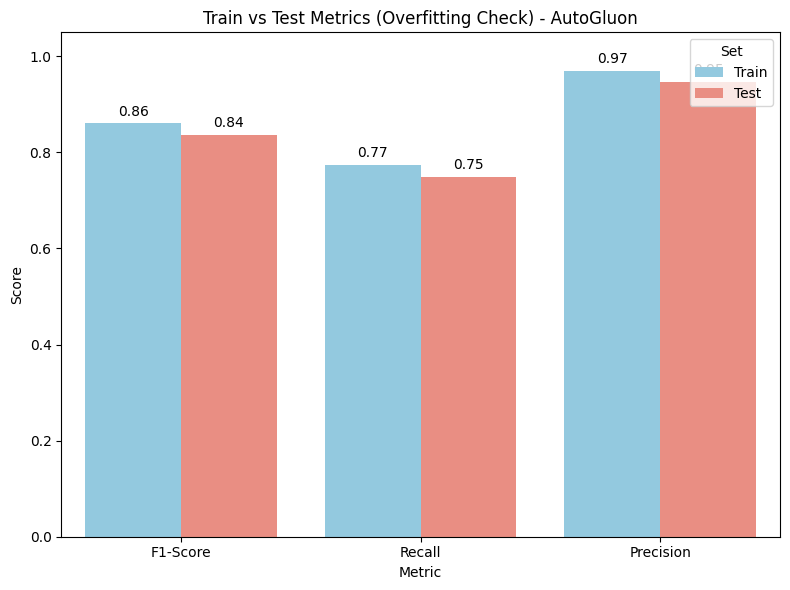

In [145]:
# --- Train set ---
y_train_true = df_train_final['is_fraud'].values
y_train_pred = predictor.predict(df_train_final).values
train_f1 = f1_score(y_train_true, y_train_pred)
train_recall = recall_score(y_train_true, y_train_pred)
train_precision = precision_score(y_train_true, y_train_pred)

# --- Test set ---
test_f1 = f1_score(y_true, y_pred)
test_recall = recall_score(y_true, y_pred)
test_precision = precision_score(y_true, y_pred)

df_overfit = pd.DataFrame({
    "Metric": ["F1-Score", "Recall", "Precision"],
    "Train": [train_f1, train_recall, train_precision],
    "Test": [test_f1, test_recall, test_precision]
})
df_overfit = df_overfit.melt(id_vars="Metric", var_name="Set", value_name="Score")
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_overfit, x="Metric", y="Score", hue="Set", palette=["skyblue", "salmon"])
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 0.01,
            f'{height:.2f}',
            ha="center", va="bottom"
        )
plt.title("Train vs Test Metrics (Overfitting Check) - AutoGluon")
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.tight_layout()
plt.grid(False)
plt.legend(title='Set', loc="upper right")
plt.show()

### 2.3 Save Model

In [146]:
# Save predictor (AutoGluon จะ save เป็นไฟล์ใน path ที่กำหนด)
predictor.save()

TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/ml_training/single_sequential_version/models/Classification/autogluon_output")


# Model Testing

In [147]:
df = pd.read_csv("/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/data/fraudTest_cleaned.csv", index_col=0)
predictor = TabularPredictor.load("/Users/thanyalak/Desktop/y_lims/DADS4/9000_IS_FraudDetection/repos/Credit_Card_Fraud_Detection/ml_training/single_sequential_version/models/Classification/autogluon_output")

In [148]:
# Random sample for testing
sample_df = df.sample(100).copy()

In [149]:
preds = predictor.predict_proba(sample_df)
sample_df['predicted_result'] = predictor.predict(sample_df).values.astype(int)
sample_df['fraud_probability'] = preds[1].values

In [150]:
# Add predictions and fraud probability to sample_df
sample_df['predicted_result'] = predictor.predict(sample_df).values.astype(int)
sample_df['fraud_probability'] = preds[1].values

# Select columns to display
columns_to_show = [
    'trans_date_trans_time', 'trans_num', 'cc_num',  'first', 'last', 'merchant', 'amt',
    'is_fraud', 'predicted_result', 'fraud_probability'
]
display(sample_df[columns_to_show].reset_index(drop=True))

,trans_date_trans_time,trans_num,cc_num,first,last,merchant,amt,is_fraud,predicted_result,fraud_probability
0,2020-12-19 17:11:36,14115e0d48642fc19b80fc5a353dfd89,6011367958204270,Tammy,Ayers,471,30.10,0,0,0.002077
1,2020-09-11 00:07:03,401a3ba8307f57705b1ce83f18540dda,213186551511454,Cody,Dean,268,121.48,0,0,0.005855
2,2020-12-01 04:55:14,faf3d74a08f50dd945bdecf52b3b2326,30026790933302,John,Peters,186,52.70,0,0,0.002181
3,2020-08-03 02:29:12,c3dc998ef5bb9fac001c21a210622016,4099707841315751,James,Stephens,578,38.06,0,0,0.002743
4,2020-08-14 14:34:14,112c6f14811853782c3ac61e35fb2879,4048508450704760,Cheryl,Melton,264,80.63,0,0,0.005604
...,...,...,...,...,...,...,...,...,...,...
95,2020-07-07 20:28:23,987a011142ef949831f66dec5abb3689,213157767990030,Tara,Campbell,48,756.08,0,0,0.045309
96,2020-11-30 22:07:14,db2deadbbb6e9633ecd7edb3cfbb3cb0,4996263498048679,Kendra,King,657,71.36,0,0,0.013329
97,2020-11-30 00:38:03,5ce592a38ebe0d2320af23900176e60d,3558652751678952,Teresa,Blankenship,282,6.19,0,0,0.006829
98,2020-06-28 18:56:22,72efef20228221a2a1c7c8c392aad581,4789911625179723,Dorothy,Zuniga,296,247.63,0,0,0.005889
